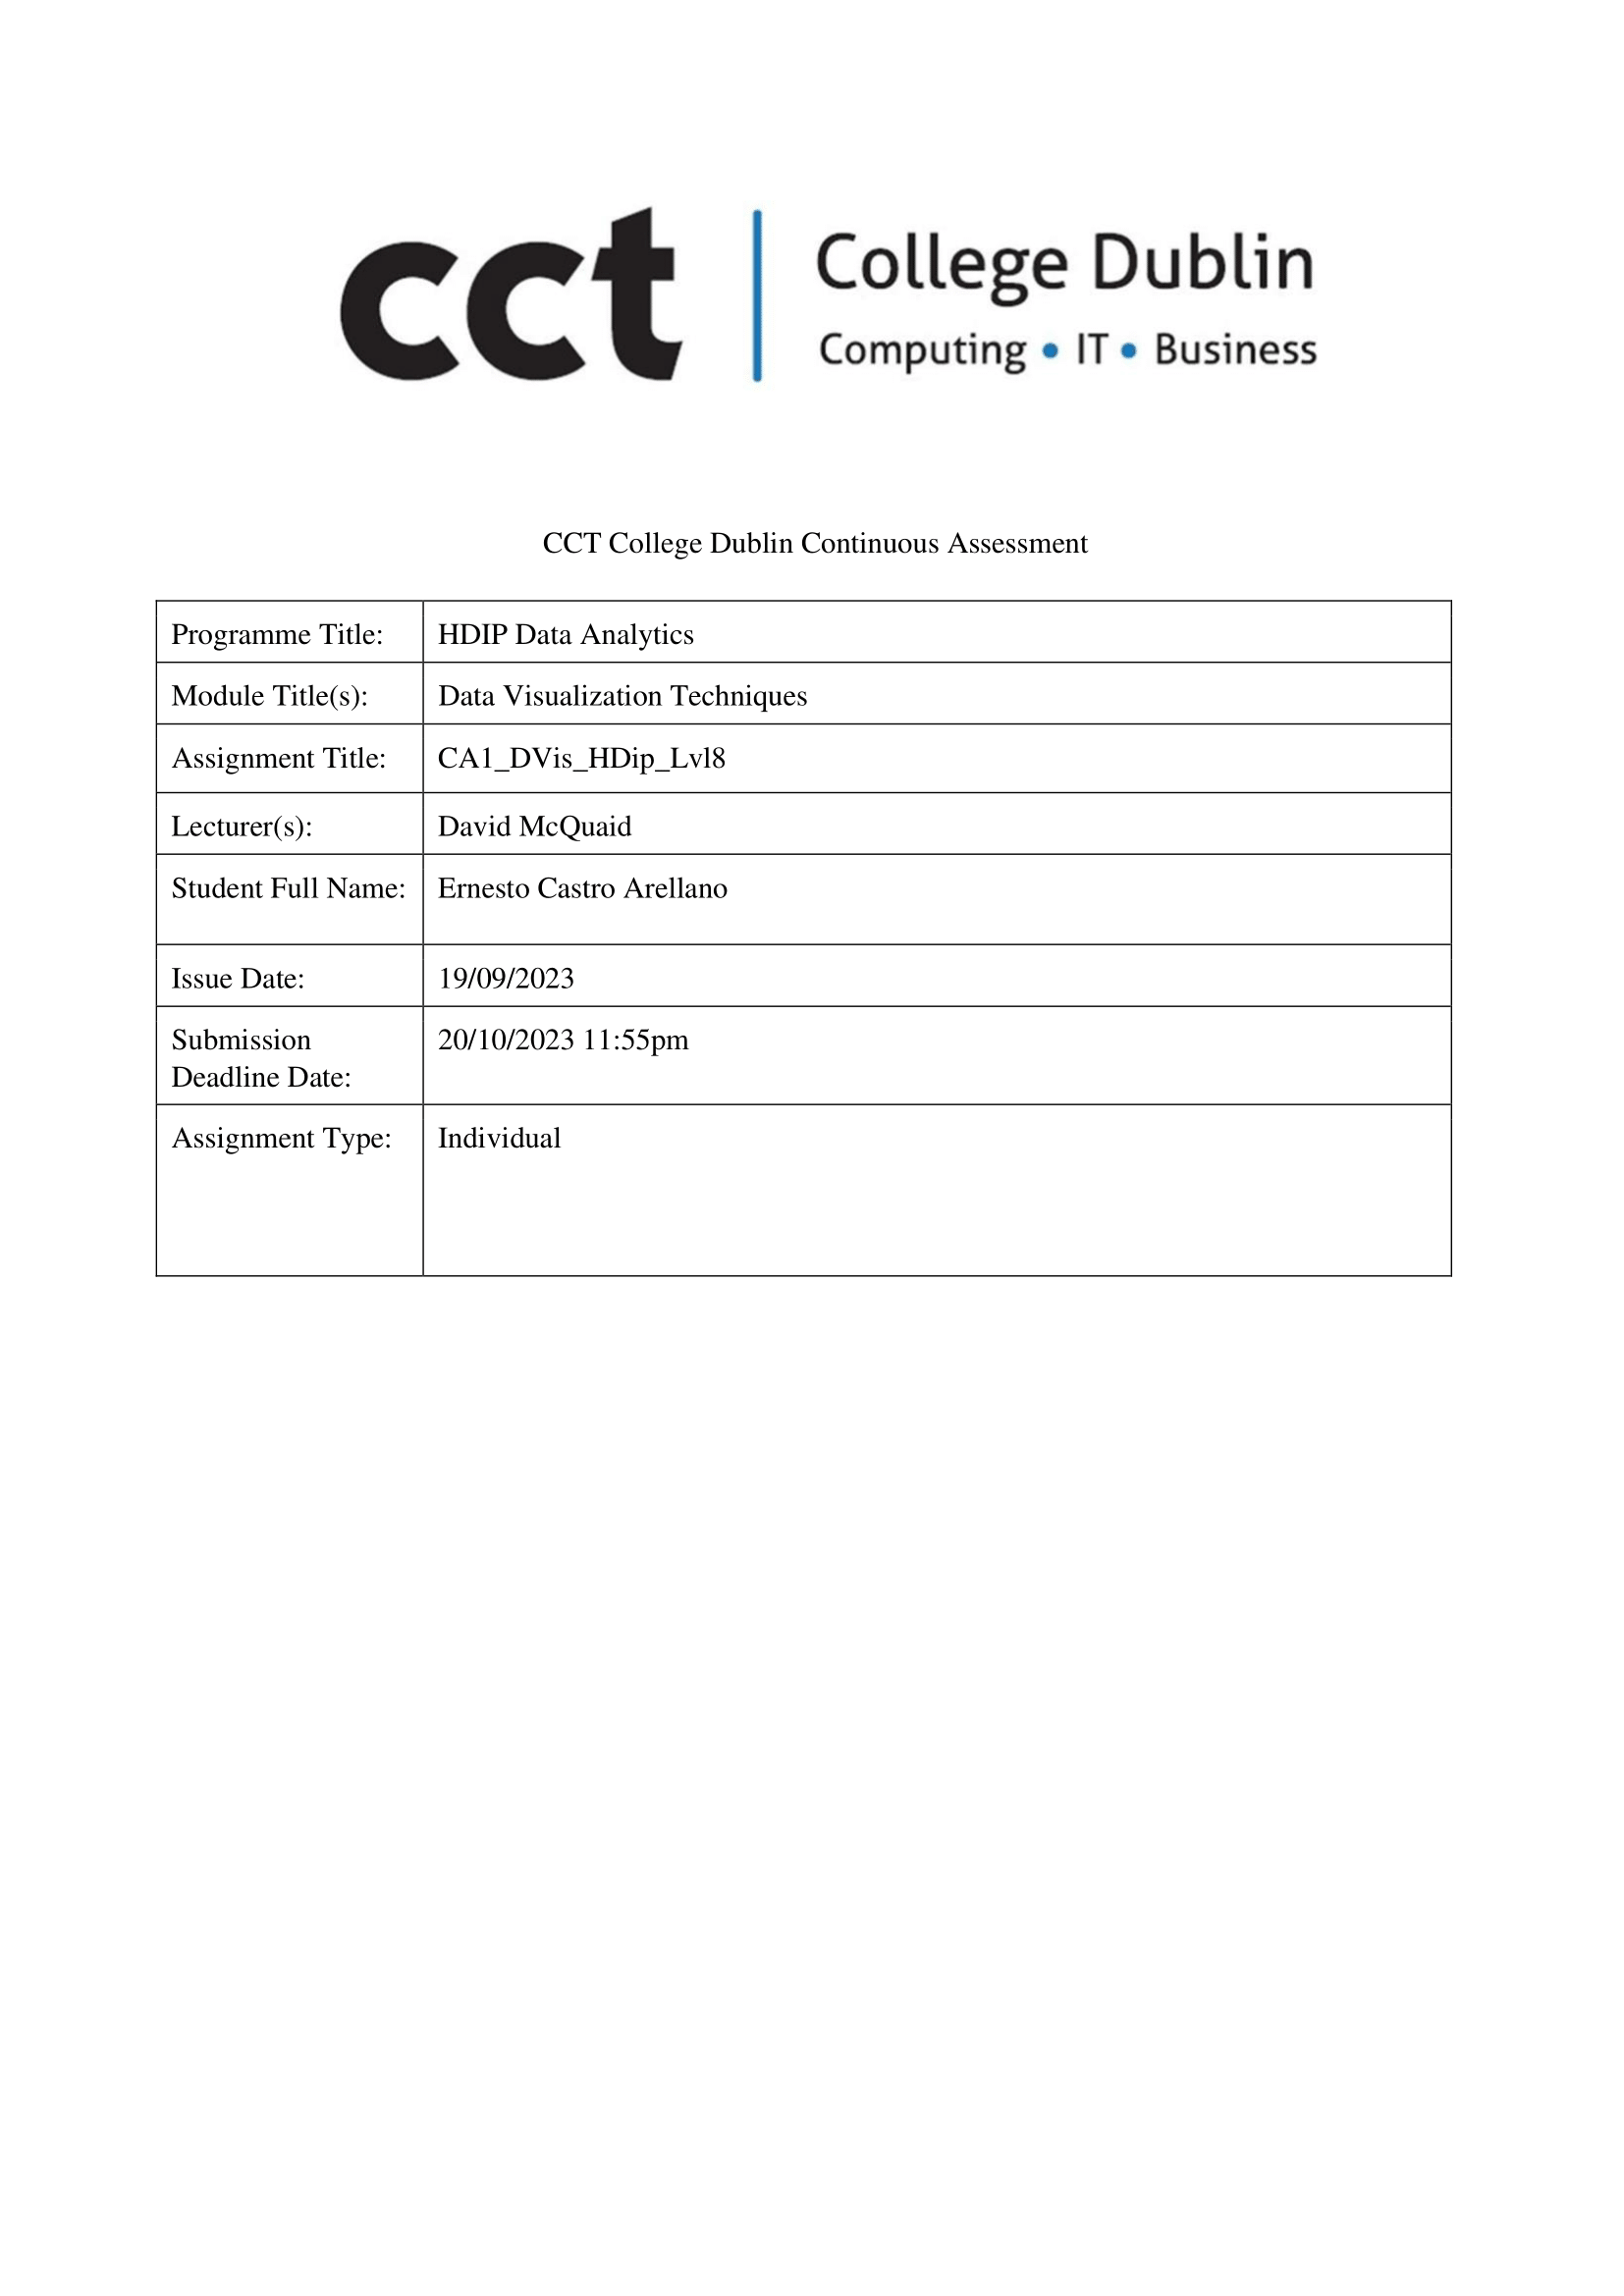

In [1]:
from IPython.display import Image
Image("HDip_DPrep_CA1_cover_sheet.png")

# Scenario:  
  
You have been retained by a retail company to analyse a dataset based on board games. This analysis will help determine the **sales strategy** for the company in their upcoming Winter season.   
  
Each answer MUST have a separate visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must generated using python.  
   
The companies CTO also requires you to rationalize all the decisions that you have made in your report.   
  
This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant.


**Requirements**
  
You are required to use the dataset contained within the file “board_games.csv” and then answer the following questions:  
  
**Part 1: (Column Names are denoted by quotation marks)  (30 marks)**
  
- What are the top 5 “average rated” games?  
- Is there a correlation between the “users_rated” and the “max_playtime”?  
- What is the distribution of game categories? (You may not use a barchart)
- Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?  
- What are the 5 most common “mechanics” in the dataset?  

**Part 2  (20 marks)**
  
- You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario.  

**Part3:  (50 marks)**
  
You must explain, in detail,   

- why you chose a specific method to engineer the data and how you achieved this in python (Part 1/Part 2)  
- why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)  
- what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)  
- what your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)  

All written work MUST be detailed in your Jupyter Markdown (NOT in code comments).  You must also provide a PDF copy of your Jupyter Notebook for dissemination.  

### Data dictionary

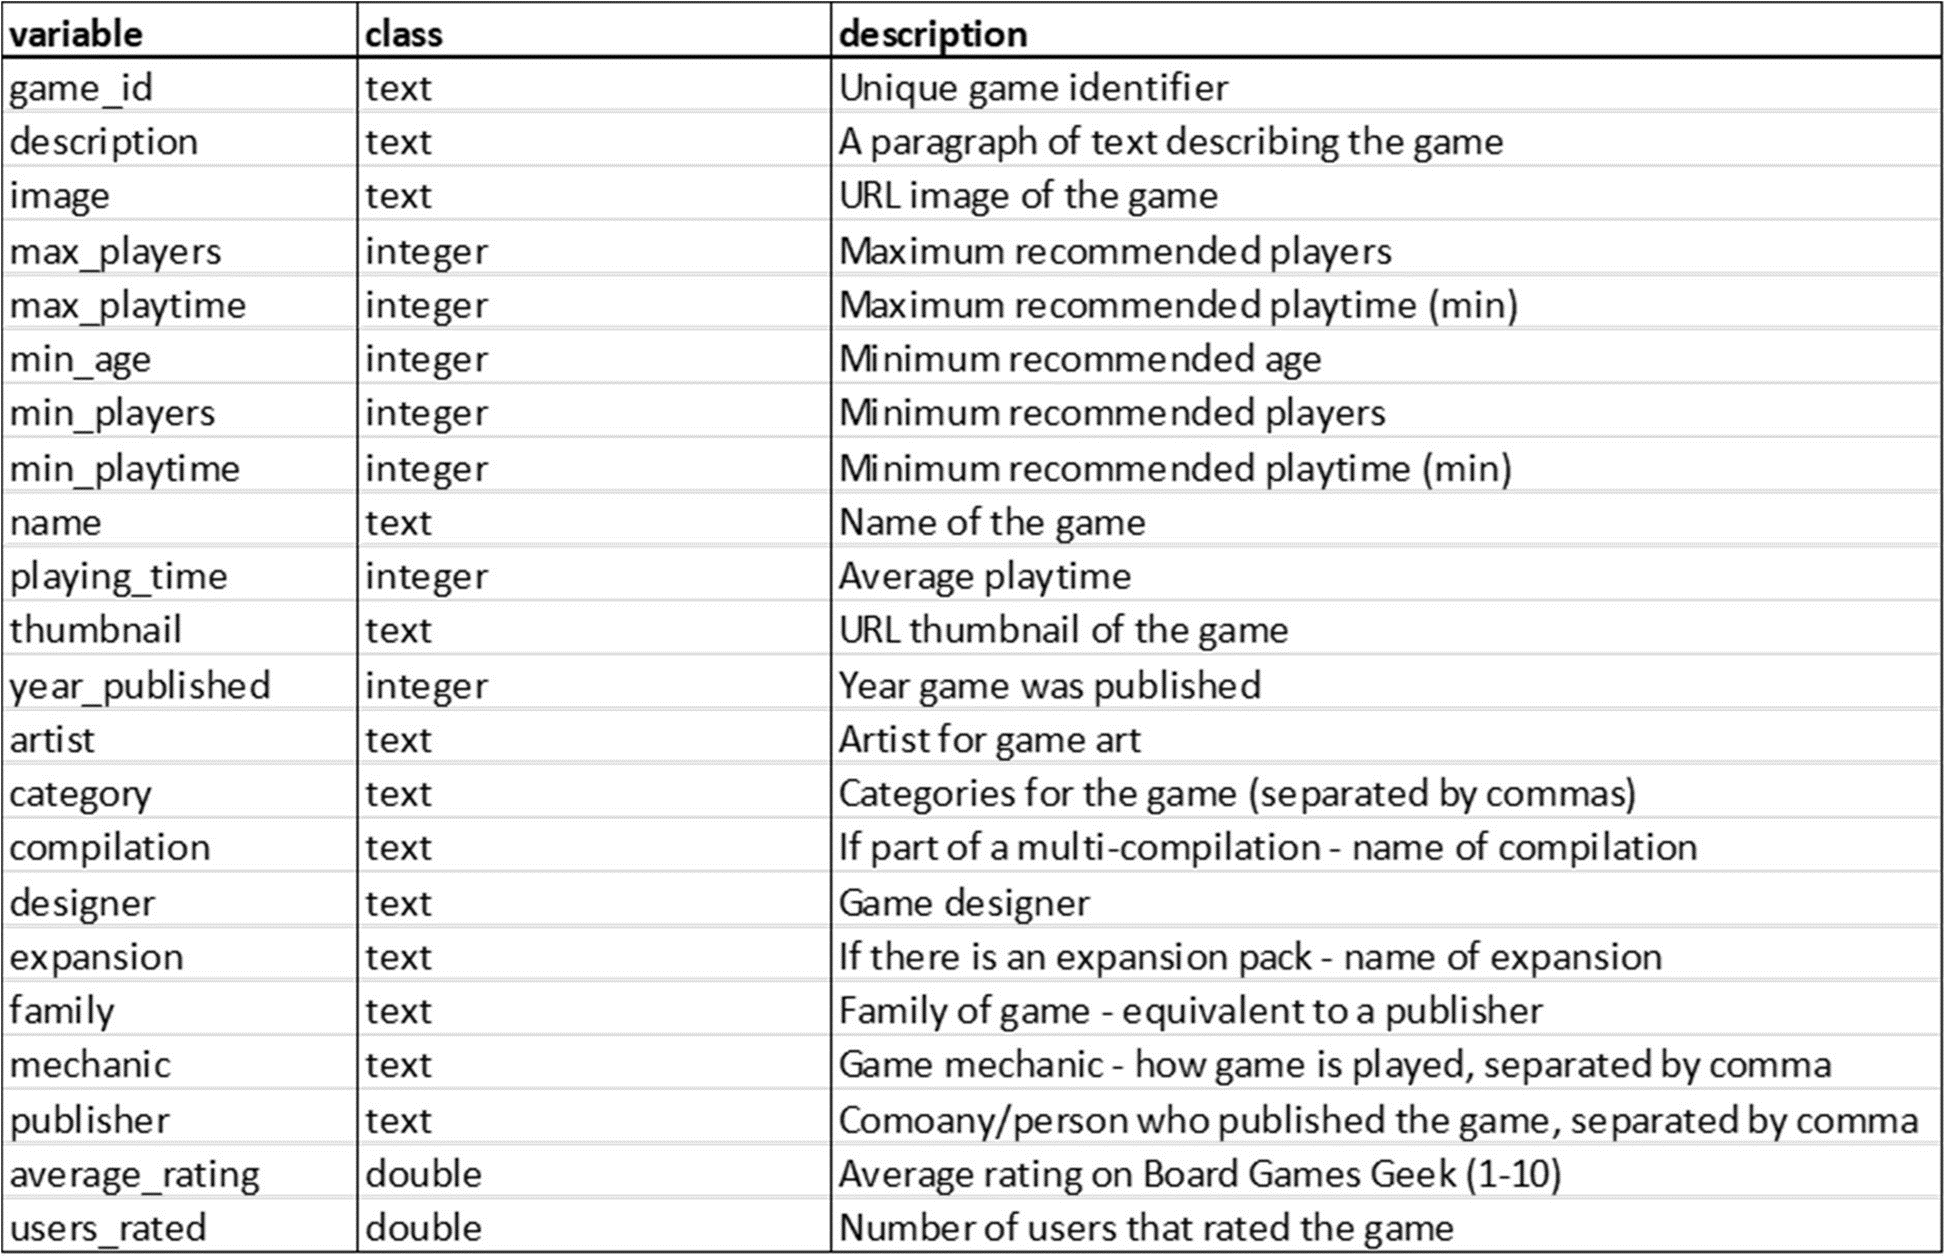

In [2]:
from IPython.display import Image
Image("Picture1.png")

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df = pd.read_csv("board_games.csv")

In [5]:
df.shape

(10532, 22)

We can observe that our dataset's total number of columns include object variables, despite the fact that some of them seem to be numerical.

In [6]:
df.dtypes

game_id             int64
description        object
image              object
max_players         int64
max_playtime        int64
min_age             int64
min_players         int64
min_playtime        int64
name               object
playing_time        int64
thumbnail          object
year_published      int64
artist             object
category           object
compilation        object
designer           object
expansion          object
family             object
mechanic           object
publisher          object
average_rating    float64
users_rated         int64
dtype: object

### Descriptive Statistics

We are given the descriptive statistics for our dataset by this function. The output of this function is a list of all the column statistic in the dataset. Identification of outliers or missing data requires a thorough understanding of the data being used. The statistics for only categorical variables are shown in the following table, where we can see the frequency, top of the class, and unique values. This dataset's numerical variables are analysed in the second table, and the following summary shows the mean, standard deviation, minimum and maximum values as well as the percentiles of 25, 50 and 75%.

In [7]:
df.describe(include=object)

,description,image,name,thumbnail,artist,category,compilation,designer,expansion,family,mechanic,publisher
count,10532,10531,10532,10531,7759,10438,410,10406,2752,7724,9582,10529
unique,10528,10527,10357,10527,4641,3860,336,4678,2634,3918,3209,5512
top,How could that have happened? Black Stories ar...,//cf.geekdo-images.com/images/pic2410035.png,Robin Hood,//cf.geekdo-images.com/images/pic2410035_t.png,Franz Vohwinkel,"Wargame,World War II","Traveller: The Classic Games, Games 1-6+",(Uncredited),"Règlement de l'An XXX,Regulations of the Year ...",Crowdfunding: Kickstarter,Hex-and-Counter,GMT Games
freq,3,2,5,2,166,449,8,558,7,391,523,180


In [8]:
df.describe(include='all')

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
count,10532.000000,10532,10531,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532,10532.000000,...,7759,10438,410,10406,2752,7724,9582,10529,10532.000000,10532.000000
unique,NaN,10528,10527,NaN,NaN,NaN,NaN,NaN,10357,NaN,...,4641,3860,336,4678,2634,3918,3209,5512,NaN,NaN
top,NaN,How could that have happened? Black Stories ar...,//cf.geekdo-images.com/images/pic2410035.png,NaN,NaN,NaN,NaN,NaN,Robin Hood,NaN,...,Franz Vohwinkel,"Wargame,World War II","Traveller: The Classic Games, Games 1-6+",(Uncredited),"Règlement de l'An XXX,Regulations of the Year ...",Crowdfunding: Kickstarter,Hex-and-Counter,GMT Games,NaN,NaN
freq,NaN,3,2,NaN,NaN,NaN,NaN,NaN,5,NaN,...,166,449,8,558,7,391,523,180,NaN,NaN
mean,62059.203095,NaN,NaN,5.657330,91.341436,9.714964,2.070547,80.882738,NaN,91.341436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.370856,870.081466
std,66223.716828,NaN,NaN,18.884403,659.754400,3.451226,0.664394,637.873893,NaN,659.754400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.850364,2880.214998
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.384210,50.000000
25%,5444.500000,NaN,NaN,4.000000,30.000000,8.000000,2.000000,25.000000,NaN,30.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.829585,85.000000
50%,28822.500000,NaN,NaN,4.000000,45.000000,10.000000,2.000000,45.000000,NaN,45.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.392965,176.000000
75%,126409.500000,NaN,NaN,6.000000,90.000000,12.000000,2.000000,90.000000,NaN,90.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.942675,518.000000


In [9]:
df.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


The code ***info()*** is used to provide information about our dataframe which is useful to analize and see how we will proceed to clean our data as it shows us the number of rows and columns in the dataframe, the total number of non-null values in each column, the data type of each column and the amount of memory used by the dataframe.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

As we can see our variables contain some null values and we will proceed to check in what columns they are 

In [11]:
df.isnull().values.any()

True

In [12]:
null_counts = df.isnull().sum()
print(null_counts)

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64


We can see from the previous table, some of the columns contain unusual or special values. Accordingly, we will proceed to change those values to **"no category"** with the following code for a better analysis since these values can affect our analysis and then proceed to confirm once more with ***info()*** that our unusual or special values have changed.

In [13]:
df.fillna("no category", inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10532 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10532 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          10532 non-null  object 
 13  category        10532 non-null  object 
 14  compilation     10532 non-null  object 
 15  designer        10532 non-null  object 
 16  expansion       10532 non-null  object 
 17  family          10532 non-null 

# Part 1

- ## 1.1 What are the top 5 “average rated” games?

The simplest methos for displaying average ratings is to create a horizantal bart graph that shows the top 5 average rated games that the company manages, with a colour palette used to highlight each game individually to make the average rating more visually appealing.

In [15]:
top_rated_games = df.sort_values(by='average_rating', ascending=False).head(5)

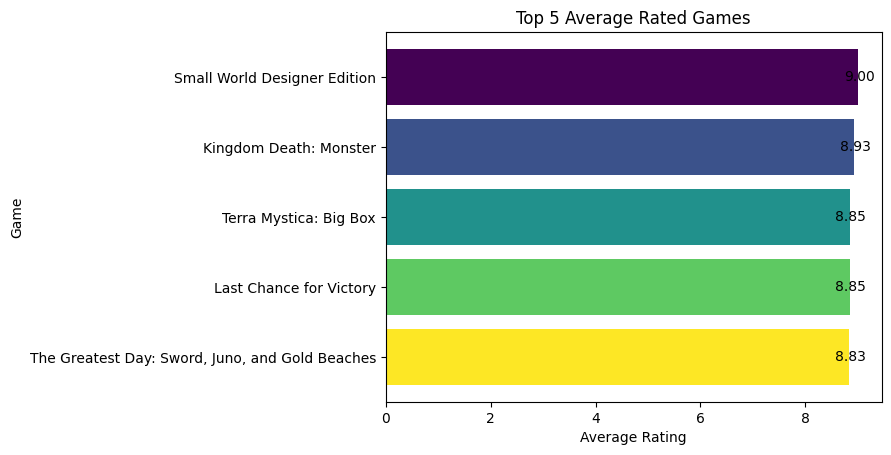

In [16]:
colors = plt.cm.viridis(np.linspace(0, 1, len(top_rated_games)))
plt.barh(top_rated_games['name'], top_rated_games['average_rating'], color=colors)
plt.xlabel('Average Rating')
plt.ylabel('Game')
plt.title('Top 5 Average Rated Games')

for i in range(len(top_rated_games)):
    plt.text(top_rated_games['average_rating'].iloc[i] + 0.02, i,
            f'{top_rated_games["average_rating"].iloc[i]:.2f}', ha='center', va='center')
    plt.gca().invert_yaxis()
    plt.show

- ## 1.2 Is there a correlation between the “users_rated” and the “max_playtime”?

We will use the correlation matrix to show how strongly the values in the columns ***“users_rated”*** and the ***“max_playtime”*** are related to each other. A correlation coefficient close to 1 indicates a strong positive linear relationship, while a coefficient close to -1  suggests a strong negative linear relationship. Acoefficient near 0 suggests little to no linear relationship between the two columns.

In [17]:
columns = ["users_rated", "max_playtime"]
df_col = df[columns]

correlation = df_col.corr()

print("Correlation Matrix")
print(correlation)

Correlation Matrix
              users_rated  max_playtime
users_rated      1.000000     -0.004342
max_playtime    -0.004342      1.000000


As wee can see in the previous table the correlation between the columns is **-0.004342**. This value is very close to zero, indicating that there is no meaningful linear relationship between these two variables as indicated by the Pearson correlation coefficient close to zero.

In order to visualize the correlation between these two columns we will use the scaterplot because it shows us the relationship between two numerical variables and as we may observe the trend is close to zero giving us as a result no correlation.

Text(0, 0.5, 'Max Playtime')

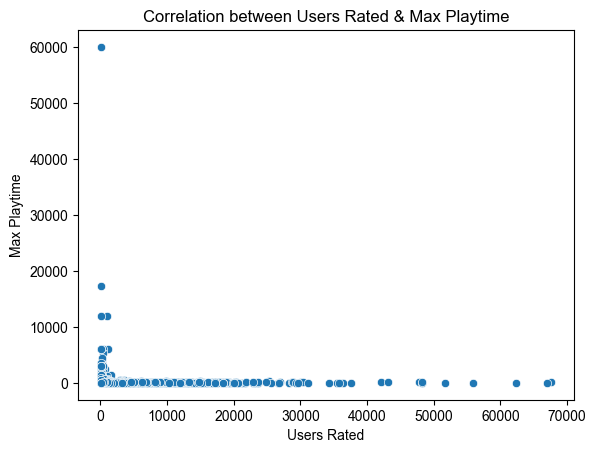

In [18]:
sns.scatterplot(x = 'users_rated', y = 'max_playtime', data = df)
sns.set_style('whitegrid')
plt.title('Correlation between Users Rated & Max Playtime')
plt.xlabel('Users Rated')
plt.ylabel('Max Playtime')

- ## 1.3 What is the distribution of game categories?

For the next step, we will use text preprocessing because the "category" column we will be analysing contains object variable.

### Basic Feature Extraction

We decided to replace the null values with "no category" as can be seen after previously analisyng our data set. As a result we can now observe that our category column no longer contains thos values.

In [19]:
df['category'].count()

10532

We will display the values from the column 'category' and because is an object variable we are  proceding to use different methods and techniques for pre-processing since it seems to be text data in order to extract better features.

In [20]:
df['category'].unique()

array(['Economic,Negotiation,Political', 'Card Game,Fantasy',
       'Abstract Strategy,Medieval', ..., 'Bluffing,Deduction,Dice',
       'Fantasy,Fighting,Miniatures,Sports',
       'Bluffing,Horror,Maze,Movies / TV / Radio theme,Science Fiction'],
      dtype=object)

**Number of Words**

Because of the fact that the category column contains text data, we will use the folowing code to count the number of words, taking into consideration that each space must be treated as a separate word.

In [21]:
df['word_count'] = df['category'].apply(lambda x: len(str(x).split(" ")))
df[['category','word_count']].head()

,category,word_count
0,"Economic,Negotiation,Political",1
1,"Card Game,Fantasy",2
2,"Abstract Strategy,Medieval",2
3,Ancient,1
4,Economic,1


**Number of characters**

Here we will calculate the number of characteres by calculating the length of each category , considerating that the calculation also include de number of spaces.

In [22]:
df['char_count'] = df['category'].str.len()
df[['category','char_count']].head()

,category,char_count
0,"Economic,Negotiation,Political",30
1,"Card Game,Fantasy",17
2,"Abstract Strategy,Medieval",26
3,Ancient,7
4,Economic,8


**Average Word Length**

We will be able to obtain the average over the course of each category using the next code, which will help us potentially enhance the model's performance.

In [23]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words) / len(words))

df['avg_word'] = df['category'].apply(avg_word)
df[['category','avg_word']].head()

,category,avg_word
0,"Economic,Negotiation,Political",30.0
1,"Card Game,Fantasy",8.0
2,"Abstract Strategy,Medieval",12.5
3,Ancient,7.0
4,Economic,8.0


**Number of stopwords**

The next codewill be added in this step to delete stopwords, which are empy words that dont add anything to the text and reduce analysis noise. Some of them could be a, an, the, is, and, in, among others.

In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')
df['stopwords'] = df['category'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['category','stopwords']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ecast\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,category,stopwords
0,"Economic,Negotiation,Political",0
1,"Card Game,Fantasy",0
2,"Abstract Strategy,Medieval",0
3,Ancient,0
4,Economic,0


**Number of special characters**

We will calculate the special characters we have within our column category and then assess their extraction based on how they affect us.

In [25]:
df['special characters'] = df['category'].apply(lambda x: len([x for x in x.split()
if x.startswith('#')]))

df[['category','special characters']].head()

,category,special characters
0,"Economic,Negotiation,Political",0
1,"Card Game,Fantasy",0
2,"Abstract Strategy,Medieval",0
3,Ancient,0
4,Economic,0


**Number of numerics**

We will calculate the numbers that appear in each category with the next code.

In [26]:
df['numerics'] = df['category'].apply(lambda x: len([x for x in
x.split() if x.isdigit()]))

df[['category','numerics']].head()

,category,numerics
0,"Economic,Negotiation,Political",0
1,"Card Game,Fantasy",0
2,"Abstract Strategy,Medieval",0
3,Ancient,0
4,Economic,0


**Number of Uppercase words**

With the next code we will verify if we have any category in Uppercase word

In [27]:
df['upper'] = df['category'].apply(lambda x: len([x for x in x.split()
if x.isupper()]))

df[['category','upper']].head()

,category,upper
0,"Economic,Negotiation,Political",0
1,"Card Game,Fantasy",0
2,"Abstract Strategy,Medieval",0
3,Ancient,0
4,Economic,0


### Basic Pre-processing

We will continue doing some of the basic pre-processing steps in order to obtain better features.  

**Lower case**

In the next step we will convert all our categories to lower case to standardising the format

In [28]:
df['category'] = df['category'].apply(lambda x: " ".join(x.lower() for x in
x.split()))

df['category'].head()

0    economic,negotiation,political
1                 card game,fantasy
2        abstract strategy,medieval
3                           ancient
4                          economic
Name: category, dtype: object

**Removing Punctuation**

In the next step we will remove any special character and replace it for an space

In [29]:
import re

df['category'] = df['category'].apply (lambda x: re.sub(r'[^\w\s]', ' ', x))
df['category'].head()


0    economic negotiation political
1                 card game fantasy
2        abstract strategy medieval
3                           ancient
4                          economic
Name: category, dtype: object

**Removal of Stop Words**

With the following code we proceed to remove any stop word as we have calculated some previous steps 

In [30]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
df['category'] = df['category'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df['category'].head()

0    economic negotiation political
1                 card game fantasy
2        abstract strategy medieval
3                           ancient
4                          economic
Name: category, dtype: object

**Common word removal**

In this step we are going to calculate the most common word in our text data and we will verify if we remove them or not.

In [31]:
freq = pd.Series(' '.join(df['category']).split()).value_counts()[:10]
freq

game        4924
card        2981
wargame     2034
fantasy     1218
war         1052
fighting     900
economic     878
science      850
fiction      850
dice         838
dtype: int64

In this particulary case we will not consider remove the common word because it can affect our categories.

**Rare words removal**

With the following code we will cvalculate the rare word found in each category and we will decide to remove them as long as they could be not useful for our analisys.

In [32]:
freq = pd.Series(' '.join(df['category']).split()).value_counts()[-10:]
freq

medical      31
vietnam      29
pike         27
shot         27
system       22
wars         15
indian       15
korean       14
expansion    11
base         11
dtype: int64

In this particuar case we will not remove any rare word since they can affect our categories

**Tokenization**

In [33]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

df['category_tokens'] = df['category'].apply(lambda x: word_tokenize(x))
df[['category', 'category_tokens']].head(10)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ecast\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,category,category_tokens
0,economic negotiation political,"[economic, negotiation, political]"
1,card game fantasy,"[card, game, fantasy]"
2,abstract strategy medieval,"[abstract, strategy, medieval]"
3,ancient,[ancient]
4,economic,[economic]
5,civilization nautical,"[civilization, nautical]"
6,abstract strategy,"[abstract, strategy]"
7,civilization fantasy,"[civilization, fantasy]"
8,exploration,[exploration]
9,fantasy travel,"[fantasy, travel]"


In [34]:
df_cat = df
df_cat['category'].count()

10532

In [35]:
df_cat['category'] = df_cat['category'].str.split(',').explode('category')

In [36]:
cat = df_cat['category'].value_counts().to_frame('count').rename_axis('category').reset_index()
cat.head(10)

,category,count
0,wargame world war ii,449
1,card game,438
2,abstract strategy,284
3,napoleonic wargame,124
4,economic,116
5,card game fantasy,110
6,dice,107
7,american civil war wargame,97
8,category,94
9,modern warfare wargame,89


With the next code we will display an histogram that show us the distibution of the number of categories in relation to their frequency.

<function matplotlib.pyplot.show(close=None, block=None)>

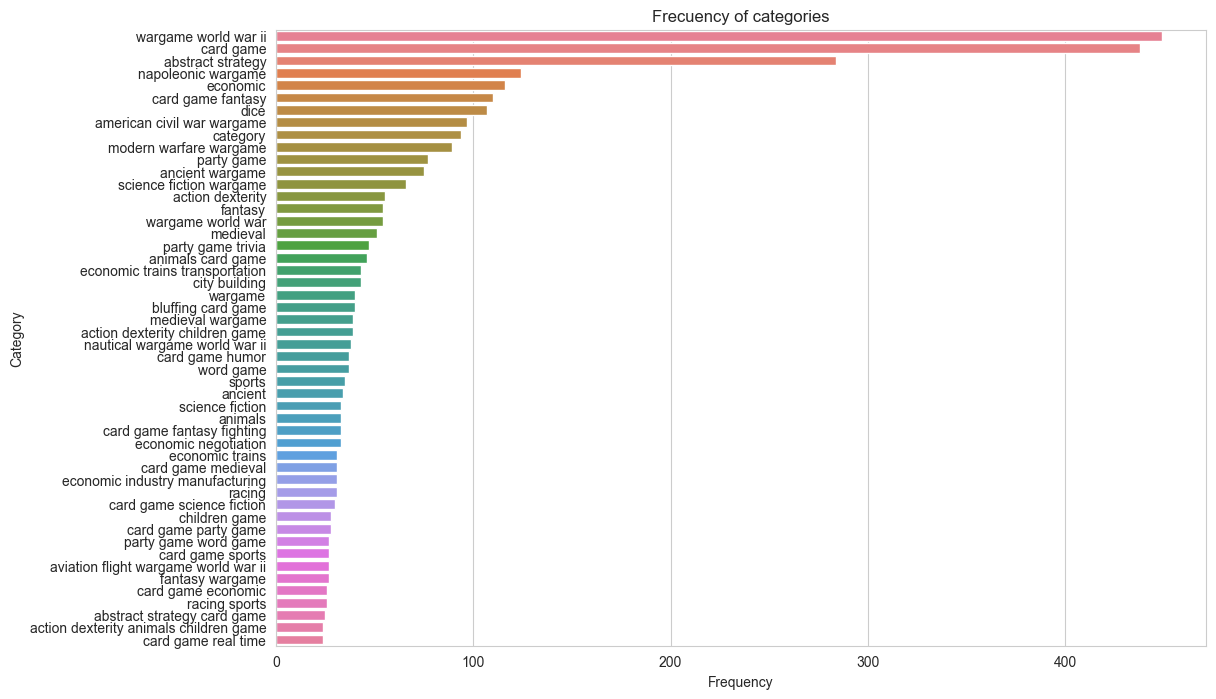

In [37]:
sns.set_style('whitegrid')
cat_top = cat.head(50)
plt.figure(figsize=(12, 8))
colors = sns.color_palette('husl', n_colors=len(cat_top))
hist_plt = sns.barplot(x='count', y='category', data=cat_top, palette=colors)

plt.xlabel('Frequency')
plt.ylabel('Category')
plt.title('Frecuency of categories')

plt.show

- ## 1.4 Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?

The following code will create two separate data sets for older games and more recent games while taking into account the fact that we will calculate the "average rating" medians for each of the groups.

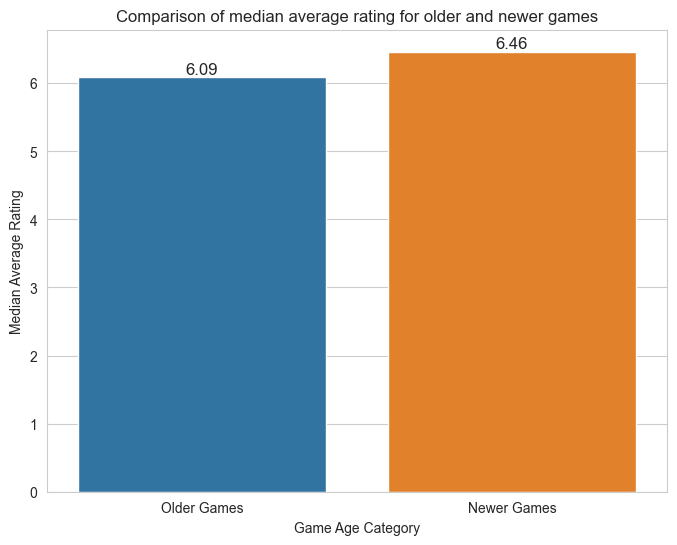

In [38]:
older_games = df[df['year_published'] <= 1992]
newer_games = df[df['year_published'] > 1992]

median_rating_older = older_games['average_rating'].median()
median_rating_newer = newer_games['average_rating'].median()

plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')

plt.title('Comparison of median average rating for older and newer games')

barplot = sns.barplot(x=['Older Games', 'Newer Games'], y=[median_rating_older, median_rating_newer])
plt.xlabel('Game Age Category')
plt.ylabel('Median Average Rating')

for index, value in enumerate([median_rating_older, median_rating_newer]):
    barplot.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)
    
plt.show()

As we can observe, newer games tend to exhibit an increase in the mean average rating. This suggests that certain games relased after 1992 may have experienced enhanced sales performance, likely attributed to various factors, including marketing and advertising efforts. Nevertheless, it is advisable to provide the company with more comprehensive data to formulate a refined sales strategy for the upcoming winter season.

- ## 1.5 What are the 5 most common “mechanics” in the dataset?

We will see that previous to this step we have replaced the special characters for "no category" then we proceed to count how many categories there are in the column.

In [39]:
df['mechanic'].nunique()


3210

In [40]:
df_cat ['mechanic']= df_cat['mechanic'].str.split(',').explode('mechanic')

In [41]:
mechanic_top5 = df_cat['mechanic'].value_counts().to_frame('count').rename_axis('mechanic').reset_index()
mechanic_top5.head(5)

,mechanic,count
0,Dice Rolling,1068
1,Hex-and-Counter,1016
2,Hand Management,647
3,no category,631
4,Set Collection,505


As we can see we have sorted our columns in descending order and we are now preparin to create a bar chart to represent this data more effectively that will provide a clearer insight into the distribution of these categories.

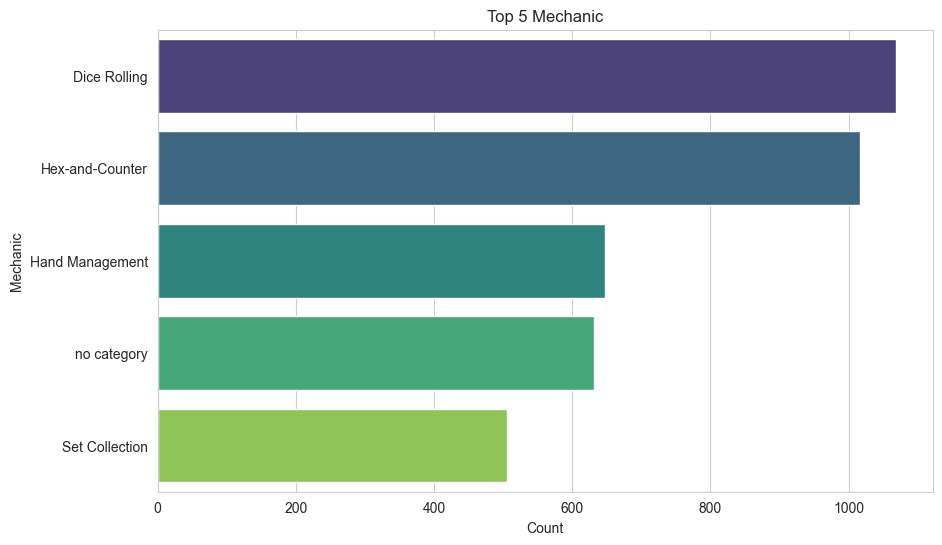

In [42]:
mechanic_top5 = mechanic_top5.head(5)

plt.figure(figsize=(10, 6))
colors = sns.color_palette('viridis', n_colors=len(mechanic_top5))

bar_plot = sns.barplot(x='count', y='mechanic', data=mechanic_top5, palette=colors)

plt.xlabel('Count')
plt.ylabel('Mechanic')
plt.title('Top 5 Mechanic')

plt.show()

# Part 2

## Is there any correlation between "average_rated" and "min_age"?

We will use the correlation matrix to show how strongly the values in the columns “average_rated” and the “min_age” are related to each other. A correlation coefficient close to 1 indicates a strong positive linear relationship, while a coefficient close to -1 suggests a strong negative linear relationship. A coefficient near 0 suggests little to no linear relationship between the two columns.

In [43]:
columns = ["average_rating", "min_age"]
df_col = df[columns]

correlation = df_col.corr()

print("Correlation Matrix")
print(correlation)

Correlation Matrix
                average_rating   min_age
average_rating        1.000000  0.167772
min_age               0.167772  1.000000


As wee can see in the previous table the correlation between the columns is 0.167772. This value is very close to zero, indicating that there is a weak positive correlation between these two variables.

In order to visualize the correlation between these two columns we will use the scaterplot because it shows us the relationship between two numerical variables.

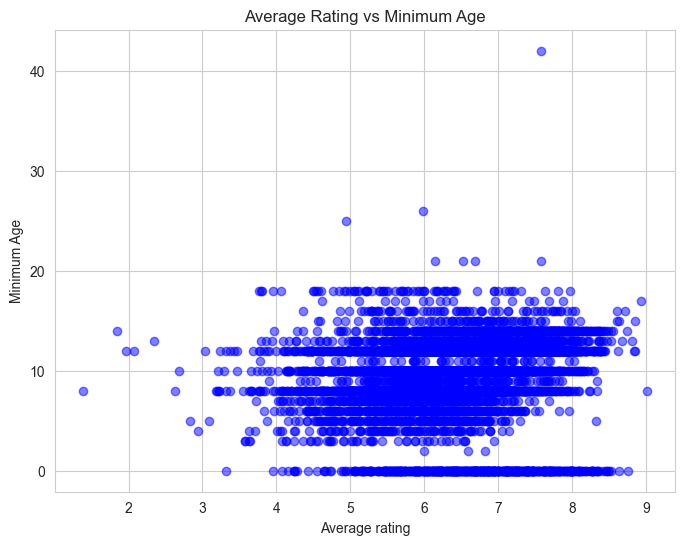

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(df_col['average_rating'], df_col['min_age'], alpha=0.5, color='b', marker='o')

plt.xlabel('Average rating')
plt.ylabel('Minimum Age')
plt.title('Average Rating vs Minimum Age')

plt.show()

# Part 3

- **why you chose a specific method to engineer the data and how you achieved this in python (Part 1/Part 2)**
- **why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)**
- **what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)**


The first thing I did was display the types of columns that we have within our dataset to determine if they are text type or numerical type in order to decide how we would work with them, based on this information. The statistical data of each column was subsequently analyzed.

I later used info() to display the information of the columns in a more detailed way and thus be able to recognize which columns contained atypical data and based on that, decide how to treat the data within the selected columns used to perform the analysis. However, after analyzing that there were atypical data, the decision was made to keep them and only replace their value so as not to affect the analysis.

PART 1

What are the top 5 “average rated” games?

To analyze this question, I decided to create an alternative column where we would include the data from the average_rated column and sort it in ascending order. Thereafter, it was concluded that the most effective way to display the information would be through a bar graph where the name of the category would be displayed on the y axis (in this case using our “name” column) and the “average_rated”on the x axis. Additionally a palette of highlighting colors was added to make the graph more attractive and the value of each bar since the values of each of the categories was very close.

Is there a correlation between the "users_rated and the "max_playtime"

To answer this question, we consider usimg the correlation matrix, as it is a tool used to understand  the relationship between two variables in a dateset. A positive correlation coefficient obtained would determine whether these variables are related. A positive correlation would be indicated by a value close to 1, while a negative correlation would be reflected in a value close to -1. A value close to 0 would indicate that there is a not strong correlation between them, which is the case with our results.
Based on the above, and cosidering that we had two quantitative variables, I decided to use a scatterplot to visualize the information, as it is one of the best graphical representations to observe data dispersion and how they relate to each other, allowing us to identy patterns and trends.
Additionally, a grip (whitegrid) was added to the graph to facilitate the identification of data dispersion of game categories.

What is the distribution of game categories? 

For the next step, because the column is type text, I used text pre-processing since it serves the purpose of preparing the text data in a clean and structured format, enabling more effective analysis therefore I had to use different steps of basic feature extraction and basic pre-processing to treat the data. As a result, because the column category was type text I decided to visualise the distribution of my categories with a histogram chart in relation to their frequency adding just the 50 with more frequency and also using a proper palette of colours to have a more attractive graph.

Do older games (1992 and earlier) have a higher MEDIAN "average rating" than newer games (after 1992)?

To address this question, I chose to use a bar chart as a visual tool. This chart allows us to effectively compare two sets of data: older games and more recent games, with 1992 as the reference year. This choice is based on the idea of evaluating how the video game industry has evolved in terms of rating over time.
To carry out this comparison, I added specific code that categorizes games into two district groups: games prior to 1992 and games after 1992. Once categorized, the code calculates the averages rating for each of these groups. This division and calculation of averages help us better understand if there are significant differences in the rating given to games based on their age.
Finally, to present the results visually, I used the bar chart, where each bar represents one of game groups. Additionally, I added the numerical values at the top of each bar to highlight the average ratings, making it easier to identify differences and trends more clearly and effectively.

What are the 5 most common "mechanics" in the dataset?

In this step,  I carried out an additional text processing phase to clean and prepare the categories within the 'mechanics' column for subsequest graphical representation. This entails data cleaning to ensure that the categories are in a consistent format and ready for visual analysis.
In addition to data cleaning, we performed a sorting process on these categories in descending order. This was done to facilitate their graphical representation, ensuring that the most relevant or frequest categories are prominently positioned for clearer data interpretation.
Finally, to visualize this data effectively and attractively, we created a horizontal graph displaying these categories. In the graphical representation, I used a carefully selected color palette to ensure that the information is visially appealing and easy to interpret. This approach not only aids in effectively presenting the data but also enhances the understanding of any relationships and patterns that may exist among the 'mechanic' categories.

PART 2

Is there any correlation between "average_rated" and " min_age"?

To answer this question, I began by considering two numeric columns. Initially, I used a correlation matrix to identify any relationships between these columns. Subsequently, based on the type of variables involved, I opted for a scatterplot to visualized and observe the data dispersion.


- **what your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)**

Our data was dispersed, allowing us to see the density of each variable and determine that the correlation is almost null because the data is close to zero. The scatterplot was chosen because it is the best graph for representing such information and because we have two variables of type numeric.  Having said that, we were able to determine that there is no direct association between the minimum age of the consumer and the average rated.
In conclusion the company should think about changing its marketing plan to expand its market to that population with the promotion of its products.


# References

Fundamentals, P. (2023). Exploratory Data Analysis (EDA) with Python: A Hands-On Guide. [online] Medium. Available at: https://towardsdev.com/exploratory-data-analysis-eda-with-python-a-hands-on-guide-5c2c5ea1dfb7 [Accessed 23 Oct. 2023].

www.w3schools.com. (n.d.). PHP explode() Function. [online] Available at: https://www.w3schools.com/php/func_string_explode.asp.

Statistics Globe. (n.d.). Color Scatterplot Points in R (2 Examples) | Draw XY-Plot with Colors. [online] Available at: https://statisticsglobe.com/color-scatterplot-points-in-r.

pandas.pydata.org. (n.d.). pandas.Series.value_counts — pandas 2.0.0 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html.

Stack Overflow. (n.d.). How to display images in a row with IPython display? [online] Available at: https://stackoverflow.com/questions/36006136/how-to-display-images-in-a-row-with-ipython-display [Accessed 24 Oct. 2023].

Agrawal, R. (2021). Must Known Techniques for Text Preprocessing in NLP. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/06/must-known-techniques-for-text-preprocessing-in-nlp/.

Zach (2021). How to Use describe() Function in Pandas (With Examples). [online] Statology. Available at: https://www.statology.org/pandas-describe/ [Accessed 24 Oct. 2023].

seaborn.pydata.org. (n.d.). Controlling figure aesthetics — seaborn 0.11.2 documentation. [online] Available at: http://seaborn.pydata.org/tutorial/aesthetics.html.
